# 피마 인디언 당뇨병 데이터

- 데이터 활용 목적 : 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립

- 데이터 개요
    - 파일명 : diabetes.csv
    - 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
    - 일반적으로 알려진 당뇨병의 원인은 식습관과 유전
        - 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속됨
        - 20세기 후반 서구화된 식습관으로 많은 당뇨 환자가 발생
        
    - 피처
        - Pregnancies : 임신 횟수
        - Glucose : 포도당 부하 검사 수치
        - BloodPressure : 혈압(mm Hg)
        - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
        - Insulin : 혈청 인슐린(mu U/ml)
        - BMI : 체질량지수(체중(kg)/키(m)^2)
        - DiabetesPedigreeFunction : 당뇨 내력 가중치 값
        - Age : 나이
        - Outcome : 클래스 결정 값(0 또는 1) => 종속변수로 사용

# 유전...이 꼭 들어가야할것같아용

In [659]:
# auc , f1-score, 재현율 평가지표로 쓴다.

In [660]:
# 도메인 지식
# https://www.ndss.com.au/wp-content/uploads/fact-sheets/translated/fact-sheet-understanding-type2-diabetes-korean.pdf
# Type-2 당뇨병 : 주요 증상으로는 다갈증(polydipsia), 다뇨증(polyuria), 체중 감소
# 과거 임신성 당뇨병 병력
# 고령
# 건강 체중 범위 이상의 체중 

In [661]:
# BMI Body Mass Index

# 성인의 경우 11-15 (한국인기준) 정상범위
# 25 넘어가면 비만 

# 나이에 따른 BMI 수치 비교도 해야겠다 0 - 19 , 19 upper

In [662]:
# Glucose : 포도당 부하 검사 수치
# 정상
# 공복 혈당 110mg 이하, 식후 2시간 혈당 140 이하
# 당뇨 126 이상 200 이상
# 경계형 110 ~ 125  / 141~ 199mg  => 당뇨라고 취급하자 

# 필요한것 import

In [757]:
import numpy as np
import pandas as pd
import seaborn as sns
# 시각화
import matplotlib.pyplot as plt

# 검정통계
from scipy import stats

# knn 이진 분류
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression # 로지스틱


# 스케일러 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 데이터 고르기
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# 회귀로 예측할것임 

# 평가 지표
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score, recall_score, classification_report


In [664]:
df = pd.read_csv("./data/diabetes.csv")

In [665]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [666]:
df.shape

(768, 9)

In [667]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [668]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [669]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- 단위 모두 다름( knn 쓸때 스케일링 필요)

# 그래프로 선형성 체크해보기

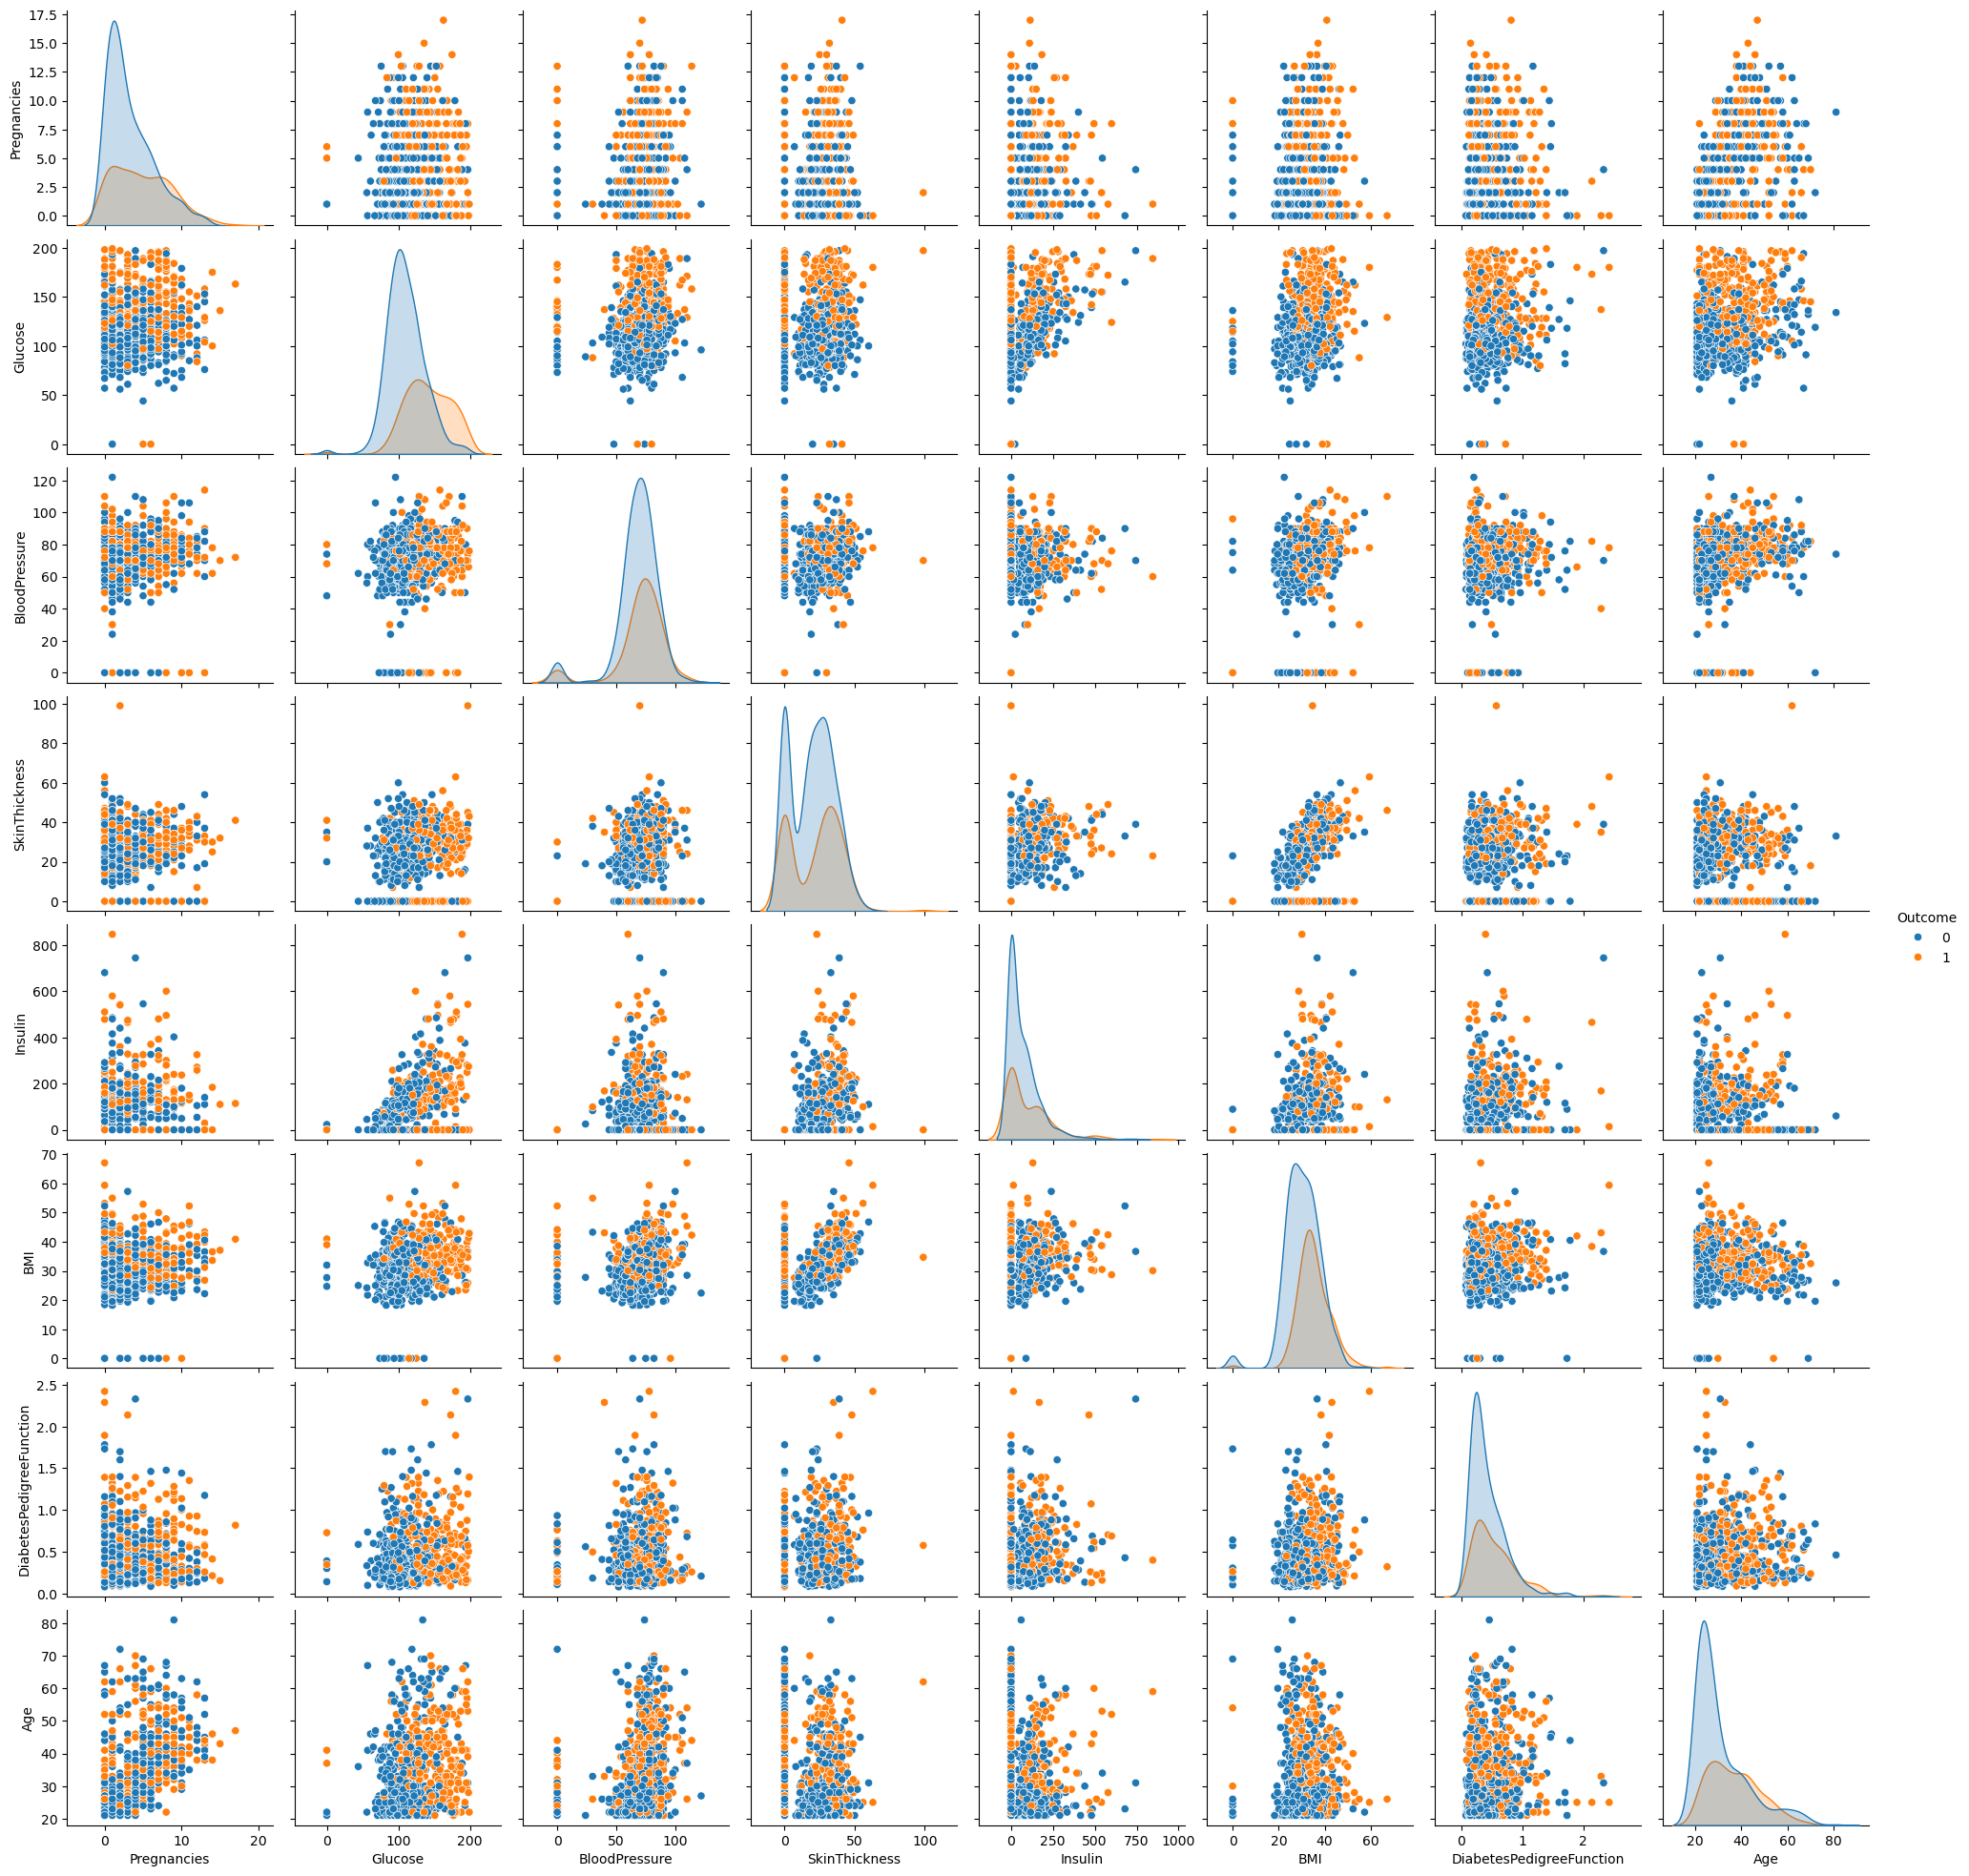

In [823]:
sns.pairplot(df, hue = "Outcome")
plt.show()

- 선형관계가 뚜렷하지 않은 것으로 보임
- 피하지방 쌍봉임... 악악

In [671]:
# 나이 부터 한번 보기
df[df["Age"] <= 20]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


- 성인 기준으로 한 데이터임

In [777]:
# 성인기준 BMI 로 나눠보자
# BMI Body Mass Index

# 성인의 경우 11-15

In [751]:
df.sort_values("BMI")[["Age","BMI","Insulin","Outcome"]].head() # BMI 수치가 0.0 인데 이게 결측치 인듯

,Age,BMI,Insulin,Outcome
49,24,0.0,0,0
60,21,0.0,0,0
706,30,0.0,0,1
81,22,0.0,0,0
684,69,0.0,0,0


In [675]:
len(df[df["BMI"] == 0 ]) # 11개 row 어떻게 할까 없앨까 말까...
# bmi 를 추정할 수 있는게 없으므로 이 row 는 없애겠음

11

## bmi 0 없애기

In [828]:
clean_df = df[~(df["BMI"] == 0)]

# 혈압 0 인 것 처리
- 혈압이 0 인 row 는 35개 정도 있으니 없애버릴까... 아님 평균값으로 대체할까

In [829]:
clean_df.loc[clean_df["BloodPressure"] == 0] = clean_df["BloodPressure"].mean()

28

## 피하지방 0 인것 처리

In [830]:
len(clean_df[clean_df["SkinThickness"] == 0]) # 218개나 있다고... 아이고...

218

In [840]:
# 평균값으로 대체 해버렸음
clean_df.loc[clean_df["SkinThickness"] == 0] = clean_df["SkinThickness"].mean()

In [838]:
len(clean_df[clean_df["SkinThickness"] == 0])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# 평균값으로 대체함

In [754]:
df[df["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [755]:
clean_df = clean_df[clean_df["BloodPressure"] != 0]

In [679]:
clean_df.shape

(729, 9)

## BMI 수치로 파생 변수 만들기
- 정상 범주에 속하지 않은 애들은 당뇨에 걸릴 가능성이 높을 것이다

In [680]:
# 정상 범위 18 에서 25로 간주하기
# 살이 빠지는 증상도 당뇨증상중 하나라서 11 이하는 저체중 취급
clean_df["비만"] = (clean_df["BMI"] >= 25)

In [681]:
clean_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,비만
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,True


In [682]:
clean_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,비만
Pregnancies,1.000000,0.136122,0.211173,-0.094715,-0.078445,0.015902,-0.023323,0.558903,0.227563,0.081337
Glucose,0.136122,1.000000,0.221514,0.057149,0.338131,0.209968,0.136968,0.260216,0.459236,0.164293
BloodPressure,0.211173,0.221514,1.000000,0.011497,-0.044684,0.289230,0.001987,0.325947,0.168245,0.142270
SkinThickness,-0.094715,0.057149,0.011497,1.000000,0.416810,0.402527,0.176503,-0.127837,0.094472,0.273543
Insulin,-0.078445,0.338131,-0.044684,0.416810,1.000000,0.190485,0.183362,-0.047502,0.143937,0.131124
BMI,0.015902,0.209968,0.289230,0.402527,0.190485,1.000000,0.156613,0.024689,0.303431,0.573728
DiabetesPedigreeFunction,-0.023323,0.136968,0.001987,0.176503,0.183362,0.156613,1.000000,0.025966,0.186492,0.074684
Age,0.558903,0.260216,0.325947,-0.127837,-0.047502,0.024689,0.025966,1.000000,0.249033,0.063267
Outcome,0.227563,0.459236,0.168245,0.094472,0.143937,0.303431,0.186492,0.249033,1.000000,0.232108
비만,0.081337,0.164293,0.142270,0.273543,0.131124,0.573728,0.074684,0.063267,0.232108,1.000000


In [683]:
# 독립변수와 종속변수의 상관관계 유의성 먼저 체크하고 들어가기

In [684]:
clean_df["비만"]

0       True
1       True
2      False
3       True
4       True
       ...  
763     True
764     True
765     True
766     True
767     True
Name: 비만, Length: 729, dtype: bool

In [685]:
stats.spearmanr(clean_df["비만"], clean_df["Outcome"])

SignificanceResult(statistic=np.float64(0.23210837674700818), pvalue=np.float64(2.2533994755247403e-10))

In [686]:
# 0.2 정도의 상관관계 유의미함 확인 
# 파생변수로 써도 되겠다

# 인슐린도 확인

In [687]:
clean_df[clean_df["Insulin"] == 0].count() 
# 혈청 인슐린이 뭐하는 거지 => 췌장에서 분비되는 인슐린 농도래
# 없을수도 있겠구나

Pregnancies                 336
Glucose                     336
BloodPressure               336
SkinThickness               336
Insulin                     336
BMI                         336
DiabetesPedigreeFunction    336
Age                         336
Outcome                     336
비만                          336
dtype: int64

- 인슐린 확인했는디 혈중에 인슐린이 0일수도 있다

# 종속변수 비율 확인

In [688]:
clean_df["Outcome"].value_counts()

Outcome
0    478
1    251
Name: count, dtype: int64

- 언더 샘플링 해야할 가능성 고려

In [689]:
# 독립변수와 종속변수로 나눠봐야죵
x = clean_df.drop(["Outcome"], axis = 1)
y = clean_df["Outcome"]

In [690]:
# 테스트 , 트레인 세트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify= y,
    random_state = 34
)

In [780]:
# 단위 스케일링 준비( 일단 스탠다드로 스케일링 해보겠음 => **거리 분류** 할때 사용 예정 )
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [781]:
# minmax
mm = MinMaxScaler()
scaled_train2 = mm.fit_transform(x_train)
scaled_test2 = mm.transform(x_test)

# 베이스라인 모델 만들기
- 이진 분류에 특화된 분류중 하나 로지스틱 회귀 먼저 해보겠음

In [782]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [784]:
logi.score(scaled_test, y_test)

0.676923076923077

In [785]:
pred = logi.predict(scaled_test)
pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [786]:
# roc 스코어 찍기
print(roc_auc_score(y_test, pred))
# f1_score
print(f1_score(y_test, pred))
# 재현율
print(recall_score(y_test, pred))

0.6728263444681355
0.6181818181818182
0.5396825396825397


# 결과 시각화 해보기

In [787]:
# 종속변수 값확인
logi.classes_

array([0, 1])

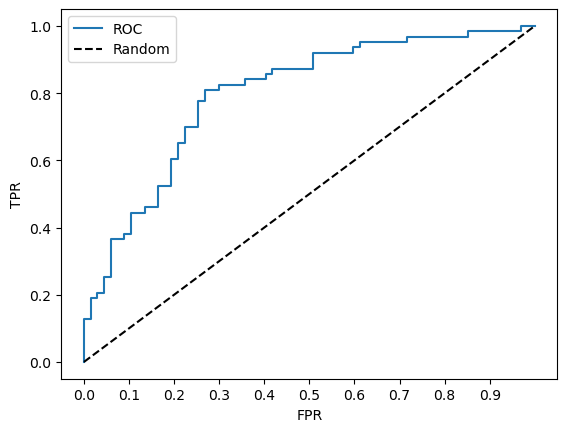

In [788]:
predict_proba_test = logi.predict_proba(scaled_test)[:, 1] # 당뇨일가능성

fprs, tprs, thresholds = roc_curve(y_test.map(lambda x : 0 if x == 0 else 1) , predict_proba_test)

plt.figure()
plt.plot(fprs,tprs, label="ROC")

plt.plot([0, 1], [0,1], "k--", label="Random")

plt.xticks(np.round(np.arange(0,1,0.1),2))
plt.xlabel("FPR")
plt.ylabel("TPR")


plt.legend()
plt.show()

- 모델 성능이 그닥~ 좋지는 않은것같다

In [699]:
# 스케일러 다른거 써보기

In [789]:
logi2 = LogisticRegression()
logi2.fit(scaled_train2, y_train)

LogisticRegression()

In [790]:
logi2.score(scaled_test2, y_test)

0.7153846153846154

In [791]:
pred = logi2.predict(scaled_test2)

In [792]:
# roc 스코어 찍기
print(roc_auc_score(y_test, pred))
# f1_score
print(f1_score(y_test, pred))
# 재현율
print(recall_score(y_test, pred))

0.7115612414119876
0.6666666666666666
0.5873015873015873


= 성능 떨어짐

# 파생변수 "비만" 컬럼 추가 후

In [793]:
# 독립변수와 종속변수로 나눠봐야죵
x = clean_df.drop(["Outcome"], axis = 1)
y = clean_df["Outcome"]

# 테스트 , 트레인 세트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify= y,
    random_state = 34
)

# 단위 스케일링 준비( 일단 스탠다드로 스케일링 해보겠음 => **거리 분류** 할때 사용 예정 )
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

logi = LogisticRegression()
logi.fit(scaled_train, y_train)

pred = logi.predict(scaled_test)

# roc 스코어 찍기
print(roc_auc_score(y_test, pred))
# f1_score
print(f1_score(y_test, pred))
# 재현율
print(recall_score(y_test, pred))

0.7277777777777779
0.6363636363636364
0.5555555555555556


# 베이스 라인 

In [794]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y,
    random_state = 34
)

# 단위 스케일링
ss = StandardScaler()
scaled_train1 = ss.fit_transform(x_train1)
scaled_test1 = ss.transform(x_test1)

logi1 = LogisticRegression()
logi1.fit(scaled_train1, y_train1)

pred1 = logi1.predict(scaled_test1)

# roc 스코어 찍기
print(roc_auc_score(y_test1, pred1))
# f1_score
print(f1_score(y_test1, pred1))
# 재현율
print(recall_score(y_test1, pred1))

0.7277777777777779
0.6363636363636364
0.5555555555555556


# 종속 변수 언더스케일링

In [795]:
pos_idx = clean_df[clean_df["Outcome"] == 0].sample(266, random_state = 34).index.tolist() # 당뇨 
neg_idx = clean_df[clean_df["Outcome"] == 1].index.tolist()

# 반반 뽑아야지~~~
random_idx = pos_idx + neg_idx

sample_x = x.loc[random_idx]
sample_y = clean_df["Outcome"][random_idx]


x_train4, x_test4, y_train4, y_test4 = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.25,
    stratify = sample_y,
    random_state = 34
)

# 단위 스케일링
ss = StandardScaler()
scaled_train4 = ss.fit_transform(x_train4)
scaled_test4 = ss.transform(x_test4)


logi4 = LogisticRegression()
logi4.fit(scaled_train4, y_train4)

pred4 = logi4.predict(scaled_test4)

# roc 스코어 찍기
print(roc_auc_score(y_test4, pred4))
# f1_score
print(f1_score(y_test4, pred4))
# 재현율
print(recall_score(y_test4, pred4))

0.7055200189528548
0.6779661016949152
0.6349206349206349


# 성능 체크 roc 시각화

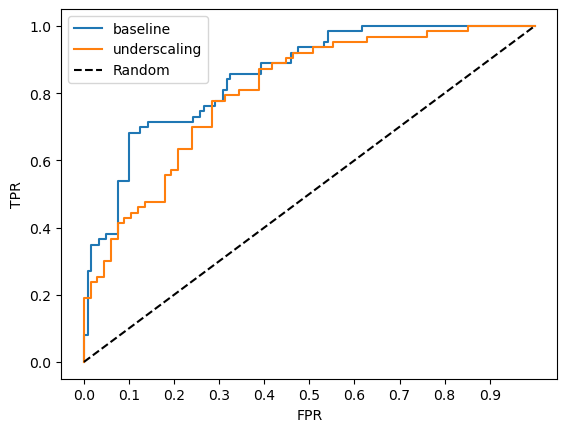

In [796]:
predict_proba_test1 = logi.predict_proba(scaled_test1)[:, 1] # 베이스라인
predict_proba_test4 = logi4.predict_proba(scaled_test4)[:, 1] # 언더스케일링

fprs1, tprs1, thresholds1 = roc_curve(y_test1.map(lambda x : 0 if x == 0 else 1) , predict_proba_test1)
fprs4, tprs4, thresholds4 = roc_curve(y_test4.map(lambda x : 0 if x == 0 else 1) , predict_proba_test4)

plt.figure()
# 두개 비교해보것으
plt.plot(fprs1, tprs1, label="baseline")
plt.plot(fprs4, tprs4, label="underscaling")

plt.plot([0, 1], [0,1], "k--", label="Random")

plt.xticks(np.round(np.arange(0,1,0.1),2))
plt.xlabel("FPR")
plt.ylabel("TPR")


plt.legend()
plt.show()

- 면적이 0.03 올랐음

# 필요한 독립변수만 뽑기

In [708]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 특성 중요도를 보고싶음 => 나무 나무

In [709]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [710]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y,
    random_state = 34
)

dt = DecisionTreeClassifier(random_state=666)
dt.fit(x_train1, y_train1)
print(dt.score(x_train1, y_train1))
print(dt.score(x_test1, y_test1))

1.0
0.6612021857923497


- 완전 과대적합됨 어캄

In [711]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', '비만'],
      dtype='object')

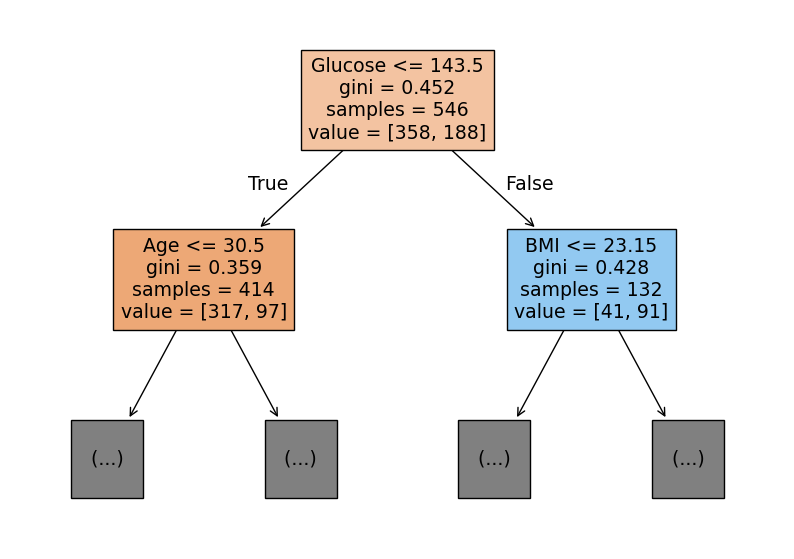

In [712]:
plt.figure(figsize=(10,7))
plot_tree(
    dt, 
    max_depth = 1, 
    filled = True,
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', '비만']
)
plt.show()

In [713]:
print(dt.feature_importances_)

[0.04213286 0.28261874 0.08383363 0.03277428 0.06800585 0.16804439
 0.1641486  0.15235733 0.00608433]


In [714]:
dt.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', '비만'],
      dtype=object)

In [715]:
max(dt.feature_importances_)

np.float64(0.2826187411874336)

- Glucose 가 특성을 나누기에 중요한 독립변수로 사용됨

In [716]:
min(dt.feature_importances_)

np.float64(0.006084333769166767)

- 비만 컬럼 특성 중요도 떨어짐

In [717]:
# 특성중요도 상위 3개의 독립변수로 예측 시도

In [718]:
# 독립변수 종속변수 재설정
x_1 = clean_df[["Glucose","BMI","Age"]]
y_1 = clean_df["Outcome"]

pos_idx = clean_df[clean_df["Outcome"] == 0].sample(266, random_state = 34).index.tolist() 
neg_idx = clean_df[clean_df["Outcome"] == 1].index.tolist() # 당뇨 

# 반반 뽑아야지~~~
random_idx = pos_idx + neg_idx

sample_x = x_1.loc[random_idx]
sample_y = y_1[random_idx]

x_train6, x_test6, y_train6, y_test6 = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.25,
    stratify = sample_y,
    random_state = 34
)

# 단위 스케일링
ss = StandardScaler()
scaled_train6 = ss.fit_transform(x_train6)
scaled_test6 = ss.fit_transform(x_test6)


logi6 = LogisticRegression()
logi6.fit(scaled_train6, y_train6)

pred6 = logi6.predict(scaled_test6)

# roc 스코어 찍기
print(roc_auc_score(y_test6, pred6))
# f1_score
print(f1_score(y_test6, pred6))
# 재현율
print(recall_score(y_test6, pred6))

0.7144041696280502
0.6991869918699187
0.6825396825396826


In [719]:
clean_df[["Glucose","BMI","Age","Outcome","Pregnancies","비만"]].corr() # 상관관계 0.2 넘기는걸로

,Glucose,BMI,Age,Outcome,Pregnancies,비만
Glucose,1.000000,0.209968,0.260216,0.459236,0.136122,0.164293
BMI,0.209968,1.000000,0.024689,0.303431,0.015902,0.573728
Age,0.260216,0.024689,1.000000,0.249033,0.558903,0.063267
Outcome,0.459236,0.303431,0.249033,1.000000,0.227563,0.232108
Pregnancies,0.136122,0.015902,0.558903,0.227563,1.000000,0.081337
비만,0.164293,0.573728,0.063267,0.232108,0.081337,1.000000


In [720]:
clean_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', '비만'],
      dtype='object')

In [799]:
# 독립변수 종속변수 재설정
x_2 = clean_df[["Glucose","Age","BMI","DiabetesPedigreeFunction"]]
y_2 = clean_df["Outcome"]

pos_idx = clean_df[clean_df["Outcome"] == 0].sample(266, random_state = 34).index.tolist() 
neg_idx = clean_df[clean_df["Outcome"] == 1].index.tolist() # 당뇨 

# 반반 뽑아야지~~~
random_idx = pos_idx + neg_idx

sample_x = x_2.loc[random_idx]
sample_y = y_2[random_idx]

x_train6, x_test6, y_train6, y_test6 = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.25,
    stratify = sample_y,
    random_state = 34
)

# 단위 스케일링
ss = StandardScaler()
scaled_train6 = ss.fit_transform(x_train6)
scaled_test6 = ss.transform(x_test6)

logi6 = LogisticRegression()
logi6.fit(scaled_train6, y_train6)

pred6 = logi6.predict(scaled_test6)

# roc 스코어 찍기
print(roc_auc_score(y_test6, pred6))
# f1_score
print(f1_score(y_test6, pred6))
# 재현율
print(recall_score(y_test6, pred6))

0.681710495143331
0.6434782608695652
0.5873015873015873


# KNN 을 써보자

### 거리기반 예측 정확도

In [722]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y,
    random_state = 34
)

# 단위 스케일링(knn 거리기반 이니까)
ss = StandardScaler()
scaled_train1 = ss.fit_transform(x_train1)
scaled_test1 = ss.fit_transform(x_test1)

# 베이스라인 거리 정확도
knn1  = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(scaled_train1, y_train1)
print("스코어", knn1.score(scaled_test1, y_test1))

y_pred1 = knn1.predict(scaled_test1)

knn_report = classification_report(y_test1, y_pred1)
print(knn_report)

스코어 0.7377049180327869
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       120
           1       0.64      0.54      0.59        63

    accuracy                           0.74       183
   macro avg       0.71      0.69      0.70       183
weighted avg       0.73      0.74      0.73       183



In [723]:
# roc 스코어 찍기
print(roc_auc_score(y_test1, y_pred1))
# f1_score
print(f1_score(y_test1, y_pred1))
# 재현율
print(recall_score(y_test1, y_pred1))

0.6906746031746032
0.5862068965517241
0.5396825396825397


In [724]:
# 교차검증~~~

In [725]:
scores = cross_validate(logi6, scaled_train6, y_train6)
print(np.mean(scores["test_score"]))

0.720945720945721


In [726]:
scores = cross_validate(logi4, scaled_train4, y_train4)
print(np.mean(scores["test_score"]))

0.7365967365967366


In [727]:
scores = cross_validate(logi1, scaled_train1, y_train1)
print(np.mean(scores["test_score"]))

0.7582652210175145


- 검증점수가 더 높은 베이스라인을 쓰는게 나을까...

In [728]:
clean_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,비만
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,True


In [729]:
important_df = clean_df[["Glucose","BMI","Age","Pregnancies","Outcome"]]

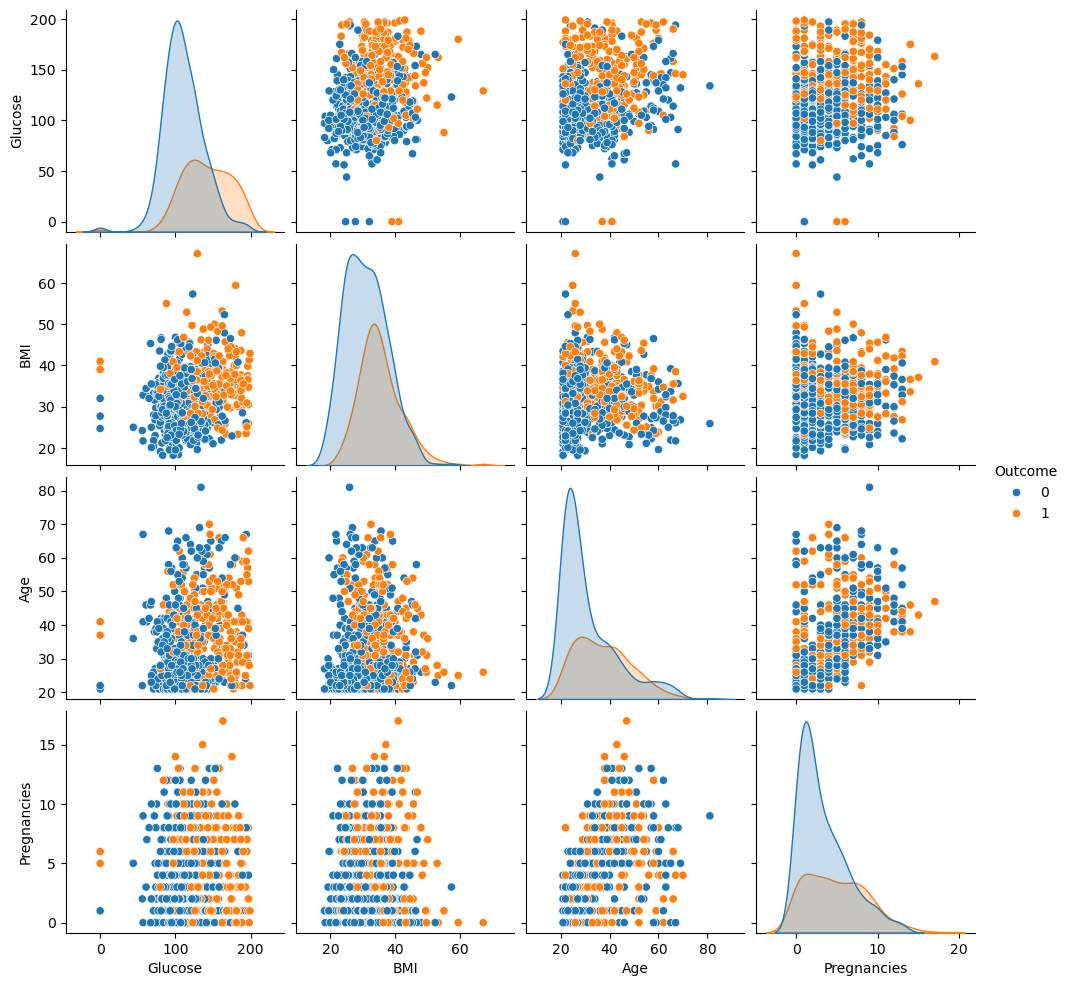

In [730]:
sns.pairplot(important_df, hue="Outcome")
plt.show()

# 선형관계인지 의심해보기

In [731]:
stats.spearmanr(clean_df["Age"], clean_df["Outcome"])

SignificanceResult(statistic=np.float64(0.31180710453206467), pvalue=np.float64(6.6859120982554425e-18))

In [732]:
stats.spearmanr(clean_df["Age"], clean_df["Glucose"])

SignificanceResult(statistic=np.float64(0.2756203628356347), pvalue=np.float64(3.55807830392791e-14))

In [733]:
stats.spearmanr(clean_df["Glucose"], clean_df["Pregnancies"])

SignificanceResult(statistic=np.float64(0.13902049698792693), pvalue=np.float64(0.000166275231559474))

In [734]:
stats.spearmanr(clean_df["Outcome"], clean_df["Pregnancies"])

SignificanceResult(statistic=np.float64(0.20936938004098268), pvalue=np.float64(1.1523008484497869e-08))

In [819]:
stats.spearmanr(clean_df["Outcome"], clean_df["DiabetesPedigreeFunction"])

SignificanceResult(statistic=np.float64(0.18483949165827274), pvalue=np.float64(5.022078136710613e-07))

- 그렇게 강한 선형관계는 아님

In [735]:
head_map = clean_df.corr()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


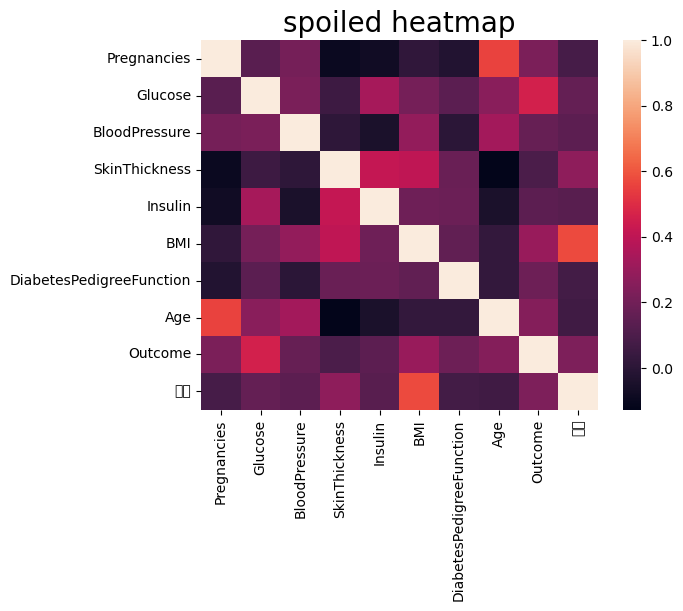

In [736]:
# heatmap by seaborn 
plt.pcolor(head_map)
ax = sns.heatmap(head_map)

plt.title('spoiled heatmap', fontsize=20)
plt.show()

- 나이와 임신횟수 => 피마 인디언 남자는용?
- Glucose 와 당뇨
- 유전이 중요하다고 그랬는디 무슨 상관관계가 있는겨...?

# 랜뽀로 성능 높이자

In [737]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [738]:
clean_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,비만
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,True
765,5,121,72,23,112,26.2,0.245,30,0,True
766,1,126,60,0,0,30.1,0.349,47,1,True


In [816]:
# 독립변수 종속변수 재설정
x = clean_df[["Glucose","BMI","Age","DiabetesPedigreeFunction"]]
y = clean_df["Outcome"]

# 언더 스케일링
pos_idx = clean_df[clean_df["Outcome"] == 0].sample(266, random_state = 666).index.tolist() 
neg_idx = clean_df[clean_df["Outcome"] == 1].index.tolist() # 당뇨 

# 반반 뽑아야지~~~
random_idx = pos_idx + neg_idx

sample_x = x.loc[random_idx]
sample_y = y.loc[random_idx]

x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.25,
    stratify = sample_y,
    random_state = 34
)

In [772]:
# 랜뽀
rf = RandomForestClassifier(n_jobs = -1, random_state = 33)
rf.fit(x_train, y_train)

scores = cross_validate(
    rf,
    x_train,
    y_train,
    return_train_score= True, # 교차 검증시 훈련 세트에 대한 점수도 함께 반환
    n_jobs = -1
)

print("train_score : ", np.mean(scores["train_score"]))
print("test_score : ",np.mean(scores["test_score"]))
print("fit_time : ",np.mean(scores["fit_time"]))



pred = rf.predict(x_test)


# roc 스코어 찍기
print(roc_auc_score(y_test, pred))
# f1_score
print(f1_score(y_test, pred))
# 재현율
print(recall_score(y_test, pred))



train_score :  1.0
test_score :  0.7313686313686313
fit_time :  0.1382673740386963
0.7606017531390666
0.7479674796747967
0.7301587301587301


# 엑스트라 트리
- 심한 과대적합이니께

In [804]:
x = clean_df[["Glucose","BMI","Age","DiabetesPedigreeFunction"]]
y = clean_df["Outcome"]

In [805]:
et = ExtraTreesClassifier(n_jobs = -1, random_state= 33)
scores = cross_validate(et, x_train, y_train, return_train_score=True, n_jobs = -1)

print("train_score : ", np.mean(scores["train_score"]))
print("test_score : ",np.mean(scores["test_score"]))
print("fit_time : ",np.mean(scores["fit_time"]))


# 엑스트라 트리도 특성 중요도 제공공공
et.fit(x_train, y_train)

pred =et.predict(x_test)

# roc 스코어 찍기
print(roc_auc_score(y_test, pred))
# f1_score
print(f1_score(y_test, pred))
# 재현율
print(recall_score(y_test, pred))

train_score :  1.0
test_score :  0.76
fit_time :  0.10933051109313965
0.7228174603174604
0.6324786324786325
0.5873015873015873


# 그레디언트 부스팅

In [821]:
x_train.columns

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'], dtype='object')

In [817]:
gb = GradientBoostingClassifier(random_state=33)
scores = cross_validate(
    gb,
    x_train,
    y_train, 
    return_train_score= True,
    n_jobs = -1
)
print("train_score : ", np.mean(scores["train_score"]))
print("test_score : ",np.mean(scores["test_score"]))
print("fit_time : ",np.mean(scores["fit_time"]))

gb.fit(x_train, y_train)

pred = gb.predict(x_test)


# roc 스코어 찍기
print(roc_auc_score(y_test, pred))
# f1_score
print(f1_score(y_test, pred))
# 재현율
print(recall_score(y_test, pred))

train_score :  0.9489675331454223
test_score :  0.7262404262404262
fit_time :  0.12694768905639647
0.7918739635157546
0.784
0.7777777777777778


# 그래디언트 부스팅 가지고 예측해보자